# Clean and Analyze Employee Exit Surveys (Data Analytics + Data Visualization)

In this project, I will work with data  exit surveys from employees of [the Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. 

The survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

There are 2 questions what I want to resolve during this project


1.   **3 Hyphotesis about women w**ork
*   As usual women work more on not main roles
*   Women tend to work in one place
*   Women tend to work until retirement, even if they are not satisfied with their jobs


2. **Why people resign as usual?**



   For understanding this I have to make couple of tasks

*   Short Data Exploration
*   Cleaning data (drop missing values and unnecessary columns)
*   Renaming columns for easier access
*   Filter the needeed data
*   Verify the data
*   Identify and working with data
*   Visualization

## Introduction to Analytics

Looking for data inside and making some explorations

In [50]:
#Import necessary libraries 
import pandas as pd
import numpy as np

#Read the data
exit_survey = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv')


#Quick exploration of the data
pd.options.display.max_columns = 150 # to avoid truncated output 
exit_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [51]:
exit_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Checking the index dtype and columns, non-null values and memory usage.
exit_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [53]:
#Looking for reasons of resignition
exit_survey["SeparationType"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

## Identify Missing Values and Drop Unneccessary Columns

First, I'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [54]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
exit_survey = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv', na_values='Not Stated')

# Quick exploration of the data
exit_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [55]:
# Remove columns we don't need for our analysis
exit_survey_updated = exit_survey.drop(exit_survey.columns[28:49], axis=1)
print(exit_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [56]:
# Remove more columns we don't need
exit_survey_updated = exit_survey.drop(exit_survey.columns[51:56], axis=1)
print(exit_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [57]:
exit_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older


## Rename columns

It would be easier for me to have names standarsized

In [58]:
#I make the names of the columns with a small letter in order to refer to them faster without making mistakes
exit_survey_updated.columns = exit_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [59]:
#Have a look on renamed columns
exit_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

##Filter the data (Women) Question 1

In [60]:
# I create a new dataframe with values for women only
data_women = exit_survey_updated[exit_survey_updated['gender'] == 'Female'].copy()

In [61]:
data_women["position"].value_counts()

Teacher                                                    219
Teacher Aide                                               126
Public Servant                                              79
Cleaner                                                     73
Head of Curriculum/Head of Special Education                21
School Administrative Staff                                 15
Guidance Officer                                             7
Technical Officer                                            6
School Based Professional Staff (Therapist, nurse, etc)      5
Professional Officer                                         4
Schools Officer                                              3
Deputy Principal                                             3
Other                                                        3
School Principal                                             3
Business Service Manager                                     3
Name: position, dtype: int64

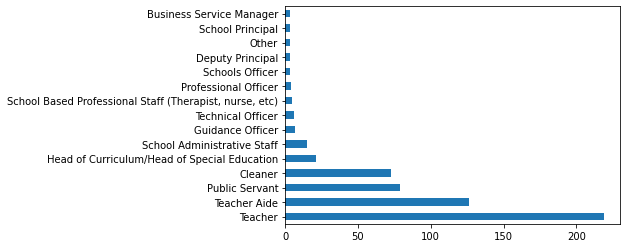

In [181]:
#Plot results for the first hyphotesis. The hypothesis is valid for this dataset
data_women['position'].value_counts().plot(kind='barh')

In [63]:
data_women["separationtype"].value_counts()

Age Retirement                          192
Resignation-Other reasons               121
Resignation-Other employer               64
Resignation-Move overseas/interstate     48
Voluntary Early Retirement (VER)         44
Ill Health Retirement                    40
Other                                    39
Contract Expired                         18
Termination                               7
Name: separationtype, dtype: int64

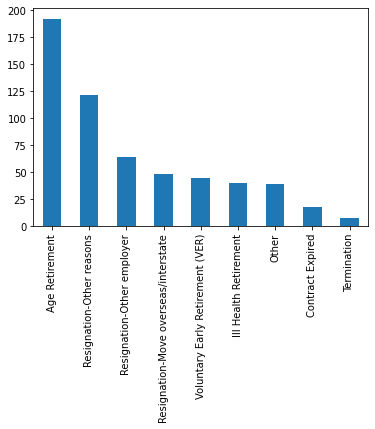

In [64]:
#Plot results for the second hyphotesis. The hypothesis is also valid for this dataset
data_women['separationtype'].value_counts().plot(kind='bar')

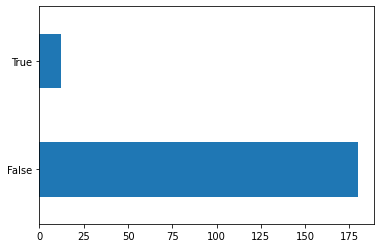

In [180]:
#I create a new dataframe with values for age retirement women only
age = data_women[data_women['separationtype'] == 'Age Retirement'].copy()
#Plot results for the third hyphothesis. The hypothesis is not valid for this dataset
age['job_dissatisfaction'].value_counts().plot(kind='barh')

##Filter the data (Resignation) Question 2

I will only analyze survey respondents who resigned, so I need only separation types containing the string 'Resignation'.

In [65]:
# Check the unique values for the separationtype column (Looking for this again)
exit_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [66]:
# Update all separation types containing the word "resignation" to 'Resignation'
exit_survey_updated['separationtype'] = exit_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
exit_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [67]:
# Select only the resignation separation types from  dataframe
data_resignations = exit_survey_updated[exit_survey_updated['separationtype'] == 'Resignation'].copy()

##Verify the Data

Below, I will cleanand explore *the cease_date* and *dete_start_date* columns to make sure all of the years make sense. 

Here are the following criteria:
Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [68]:
# Check the unique values
data_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [69]:
# Extract the years and convert them to a float type
data_resignations['cease_date'] = data_resignations['cease_date'].str.split('/').str[-1]
data_resignations['cease_date'] = data_resignations['cease_date'].astype("float")

# Check the unique values and look for outliers
data_resignations['dete_start_date'].value_counts().sort_values()

1987.0     1
1975.0     1
1984.0     1
1971.0     1
1973.0     1
1972.0     1
1963.0     1
1977.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1985.0     3
2001.0     3
1986.0     3
1995.0     4
1988.0     4
1991.0     4
1989.0     4
1993.0     5
1980.0     5
1990.0     5
1997.0     5
2002.0     6
1998.0     6
1996.0     6
1992.0     6
2003.0     6
1994.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2007.0    21
2012.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

Since the end goal is to answer the question below, I need a column containing the length of time an employee spent in their workplace, or years of service.

End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Below, I calculate the years of service in the exit_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [70]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
data_resignations['institute_service'] = data_resignations['cease_date'] - data_resignations['dete_start_date']

# Quick check of the result
data_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Next, I'll identify any employees who resigned because they were dissatisfied. Below are the columns used to categorize employees as "dissatisfied"

**exit_survey_updated:**
*   job_dissatisfaction
*   dissatisfaction_with_the_department
*   physical_work_enviroment
*   lack_of_recognition
*   lack_of_job_security
*   work_location
*   employment_conditions
*   work_life_balance
*   workload

If the employee indicated any of the factors above caused them to resign, I mark them as dissatisfied in a new column. After changes, the new dissatisfied column will contain just the following values:

**True:** indicates a person resigned because they were dissatisfied in some way

**False:** indicates a person resigned because of a reason other than dissatisfaction with the job

**NaN:** indicates the value is missing

In [71]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
data_resignations['dissatisfied'] = data_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

data_resignations_up = data_resignations.copy()
data_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Clean the Service Column (*institute_service)*

I will clean the* institute_service* column and categorize employees according to the following definitions:

**New:** Less than 3 years in the workplace

**Experienced**: 3-6 years in the workplace

**Established:** 7-10 years in the workplace

**Veteran:** 11 or more years in the workplace


In [72]:
# Check the unique values
data_resignations_up['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
14.0     6
12.0     6
18.0     5
16.0     5
24.0     4
11.0     4
23.0     4
21.0     3
19.0     3
39.0     3
32.0     3
25.0     2
28.0     2
26.0     2
36.0     2
30.0     2
34.0     1
29.0     1
27.0     1
42.0     1
33.0     1
41.0     1
49.0     1
35.0     1
38.0     1
31.0     1
Name: institute_service, dtype: int64

In [73]:
# Extract the years of service and convert the type to float
data_resignations_up['institute_service_up'] = data_resignations_up['institute_service'].astype('str').str.extract(r'(\d+)')
data_resignations_up['institute_service_up'] = data_resignations_up['institute_service_up'].astype('float')

# Check the years extracted are correct
data_resignations_up['institute_service_up'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service_up, dtype: int64

In [74]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
data_resignations_up['service_cat'] = data_resignations_up['institute_service_up'].apply(transform_service)

# Quick check of the update
data_resignations_up['service_cat'].value_counts()

Veteran        100
Experienced     76
New             56
Established     41
Name: service_cat, dtype: int64

##Visualization

Finally, I'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, I'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [75]:
# Verify the unique values
data_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [76]:
# Replace missing values with the most frequent value, False
data_resignations_up['dissatisfied'] = data_resignations_up['dissatisfied'].fillna(False)

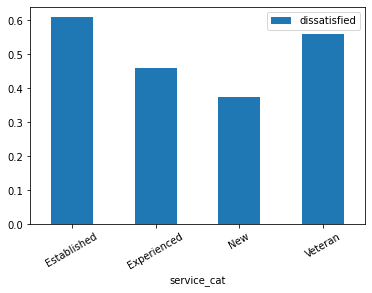

In [77]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = data_resignations_up.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, I can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.